In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from tensorflow.examples.tutorials.mnist import input_data


In [2]:
mnist = input_data.read_data_sets('datasets_lib/mnist/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting datasets_lib/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting datasets_lib/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting datasets_lib/mnist/t10k-images-idx3-ubyte.gz
Extracting datasets_lib/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
batch_size = 64
z_dimension = 100
x_dimension = mnist.train.images.shape[1]
y_dimension = mnist.train.labels.shape[1]
num_hidden = 128

In [4]:
def xavier_init(size):
    avg = size[0]+ size[1] / 2.0
    xav_stddev = 1.0/ tf.sqrt(avg)
    return tf.random_normal(shape=size,stddev=xav_stddev)


In [5]:
# Discriminator net model
X = tf.placeholder(tf.float32,[None,x_dimension])
Y = tf.placeholder(tf.float32,[None,y_dimension])

d_w1 = tf.Variable(xavier_init([x_dimension+y_dimension,num_hidden]))
d_b1 = tf.Variable(tf.zeros([num_hidden]))

d_w2 = tf.Variable(xavier_init([num_hidden,1]))
d_b2 = tf.Variable(tf.zeros([1]))

discr_vars = [d_w1,d_b1,d_w2,d_b2]

def discriminator(x,y):
    inputs = tf.concat(values=[x,y],axis=1)
    d_h1 = tf.nn.relu(tf.matmul(inputs,d_w1)+d_b1)
    d_logit  = tf.matmul(d_h1,d_w2)+d_b2
    return d_logit


    

In [6]:
#Generator net model

Z = tf.placeholder(tf.float32,[None,z_dimension])

g_w1 = tf.Variable(xavier_init([z_dimension+ y_dimension,num_hidden]))
g_b1 = tf.Variable(tf.zeros([num_hidden]))

g_w2 = tf.Variable(xavier_init([num_hidden,x_dimension]))
g_b2 = tf.Variable(tf.zeros([x_dimension]))

gen_vars = [g_w1,g_b1,g_w2,g_b2]
def generator(z,y):
    inputs = tf.concat(axis=1,values=[z,y])
    g_h1 = tf.nn.relu(tf.matmul(inputs,g_w1)+g_b1)
    g_logit = tf.matmul(g_h1,g_w2)+g_b2
    g_prob = tf.nn.sigmoid(g_logit)
    return g_prob



In [7]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

In [8]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
        
    return fig

In [9]:
g_sample = generator(Z, Y)
d_logit_real = discriminator(X, Y)
d_logit_fake = discriminator(g_sample, Y)

In [10]:
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logit_real, labels=tf.ones_like(d_logit_real)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logit_fake, labels=tf.zeros_like(d_logit_fake)))
d_loss = d_loss_real + d_loss_fake
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logit_fake, labels=tf.ones_like(d_logit_fake)))


In [11]:
d_optimizer = tf.train.AdamOptimizer().minimize(d_loss, var_list=discr_vars)
g_optimizer = tf.train.AdamOptimizer().minimize(g_loss, var_list=gen_vars)


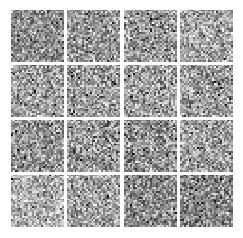

Iter: 0
D loss: 1.479
G_loss: 1.425


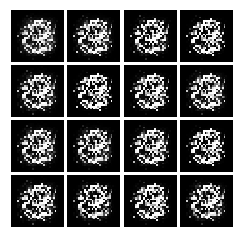

Iter: 1000
D loss: 0.007892
G_loss: 11.54


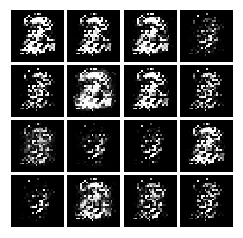

Iter: 2000
D loss: 0.02774
G_loss: 6.288


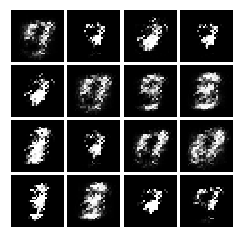

Iter: 3000
D loss: 0.06236
G_loss: 4.861


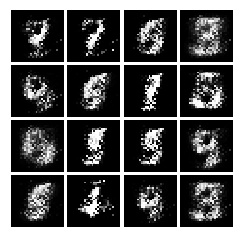

Iter: 4000
D loss: 0.131
G_loss: 5.821


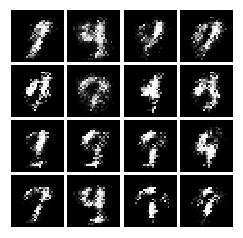

Iter: 5000
D loss: 0.1298
G_loss: 4.667


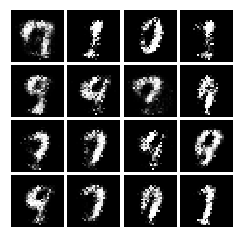

Iter: 6000
D loss: 0.303
G_loss: 4.66


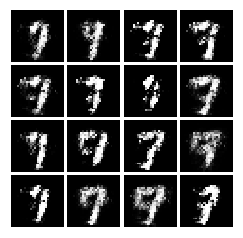

Iter: 7000
D loss: 0.2293
G_loss: 5.088


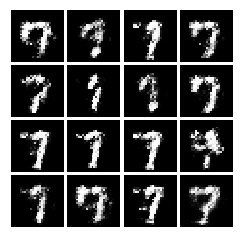

Iter: 8000
D loss: 0.5786
G_loss: 2.847


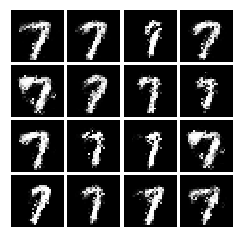

Iter: 9000
D loss: 0.52
G_loss: 3.322


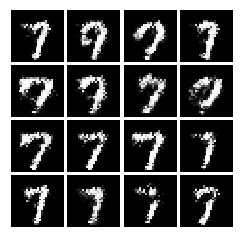

Iter: 10000
D loss: 0.8393
G_loss: 2.499


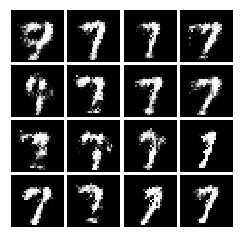

Iter: 11000
D loss: 0.561
G_loss: 3.724


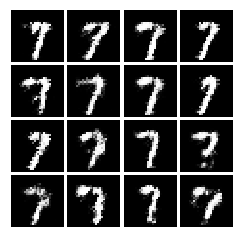

Iter: 12000
D loss: 0.9256
G_loss: 2.073


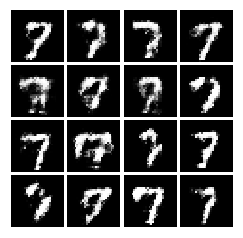

Iter: 13000
D loss: 0.5845
G_loss: 2.044


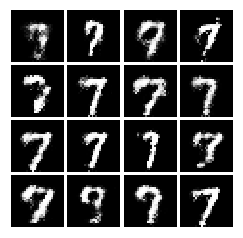

Iter: 14000
D loss: 0.9136
G_loss: 1.834


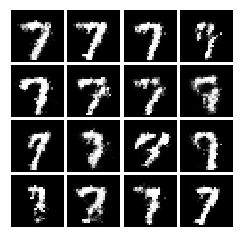

Iter: 15000
D loss: 1.012
G_loss: 1.636


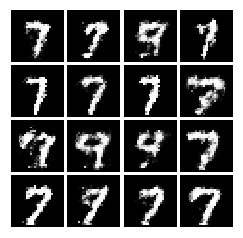

Iter: 16000
D loss: 0.6732
G_loss: 2.035


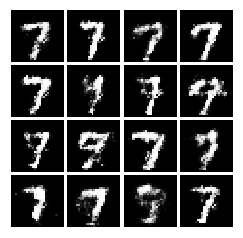

Iter: 17000
D loss: 1.134
G_loss: 1.505


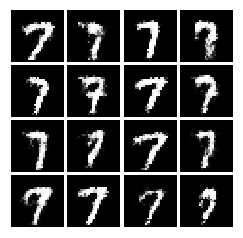

Iter: 18000
D loss: 0.6944
G_loss: 2.015


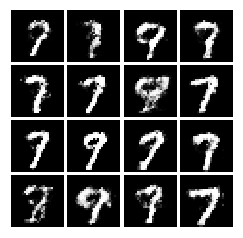

Iter: 19000
D loss: 0.8294
G_loss: 2.034


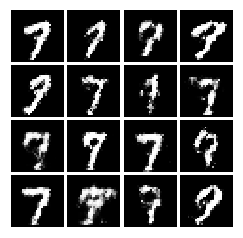

Iter: 20000
D loss: 0.8464
G_loss: 2.158


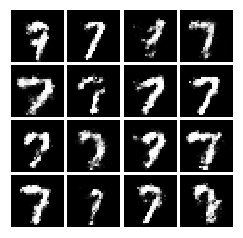

Iter: 21000
D loss: 0.7171
G_loss: 1.757


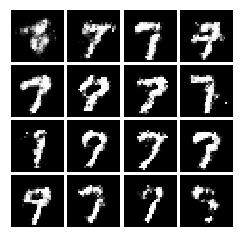

Iter: 22000
D loss: 0.807
G_loss: 1.691


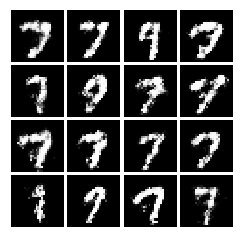

Iter: 23000
D loss: 1.083
G_loss: 1.639


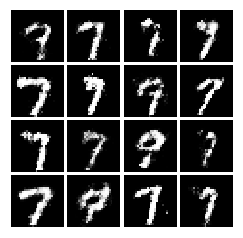

Iter: 24000
D loss: 1.237
G_loss: 1.442


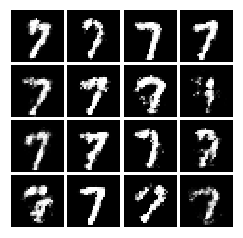

Iter: 25000
D loss: 0.822
G_loss: 1.716


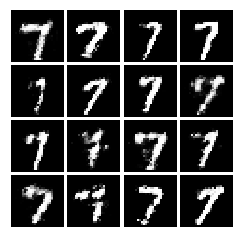

Iter: 26000
D loss: 0.8326
G_loss: 1.64


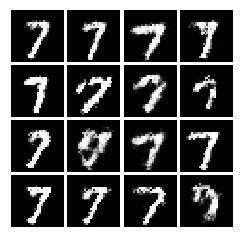

Iter: 27000
D loss: 0.7617
G_loss: 1.713


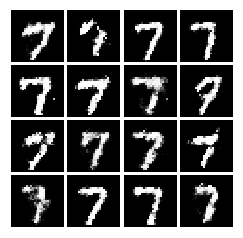

Iter: 28000
D loss: 1.057
G_loss: 1.518


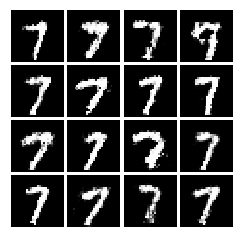

Iter: 29000
D loss: 0.8005
G_loss: 1.662


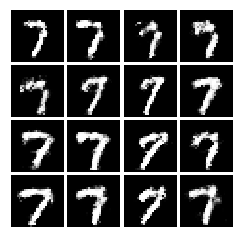

Iter: 30000
D loss: 0.7281
G_loss: 1.956


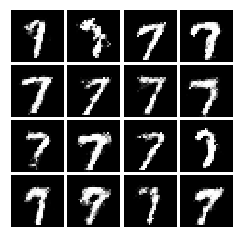

Iter: 31000
D loss: 0.7542
G_loss: 1.668


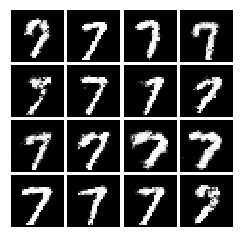

Iter: 32000
D loss: 1.039
G_loss: 1.955


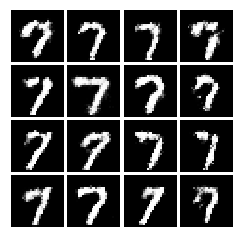

Iter: 33000
D loss: 0.7664
G_loss: 1.734


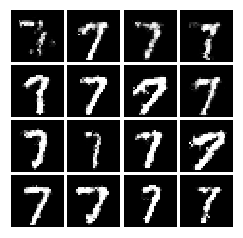

Iter: 34000
D loss: 0.8074
G_loss: 1.801


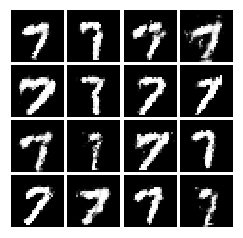

Iter: 35000
D loss: 0.8317
G_loss: 1.803


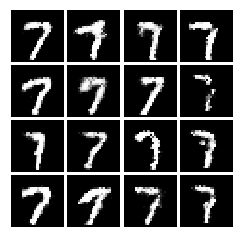

Iter: 36000
D loss: 0.9004
G_loss: 1.578


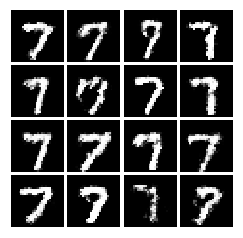

Iter: 37000
D loss: 0.8387
G_loss: 1.534


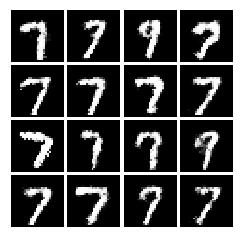

Iter: 38000
D loss: 0.9213
G_loss: 1.634


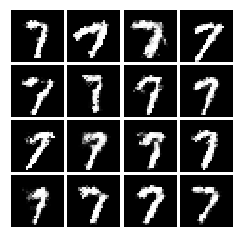

Iter: 39000
D loss: 0.9156
G_loss: 1.794


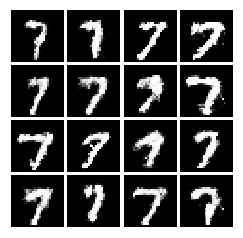

Iter: 40000
D loss: 0.8114
G_loss: 1.784


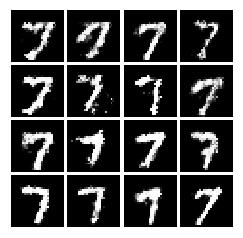

Iter: 41000
D loss: 1.046
G_loss: 1.719


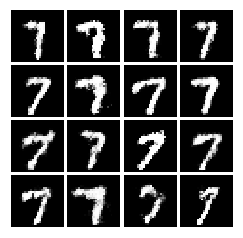

Iter: 42000
D loss: 1.035
G_loss: 1.851


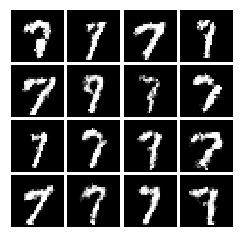

Iter: 43000
D loss: 0.8001
G_loss: 1.373


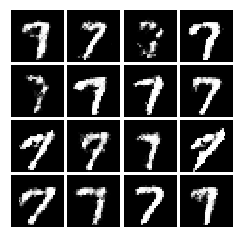

Iter: 44000
D loss: 1.13
G_loss: 1.796


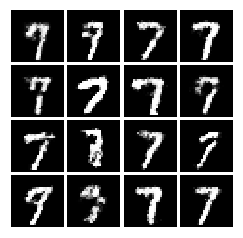

Iter: 45000
D loss: 0.8312
G_loss: 1.582


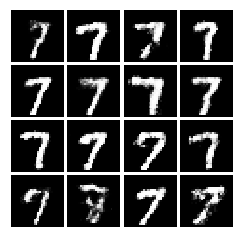

Iter: 46000
D loss: 0.9313
G_loss: 1.667


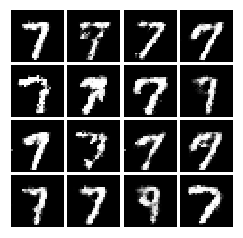

Iter: 47000
D loss: 0.8577
G_loss: 2.041


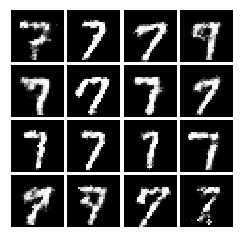

Iter: 48000
D loss: 0.9487
G_loss: 1.817


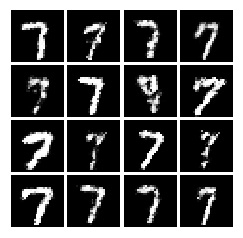

Iter: 49000
D loss: 0.7489
G_loss: 2.076


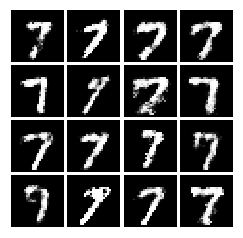

Iter: 50000
D loss: 0.7745
G_loss: 1.727


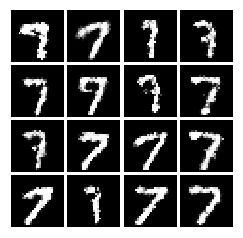

Iter: 51000
D loss: 0.927
G_loss: 1.761


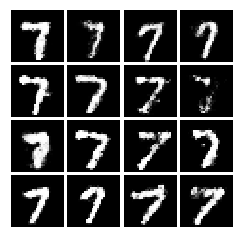

Iter: 52000
D loss: 0.997
G_loss: 1.794


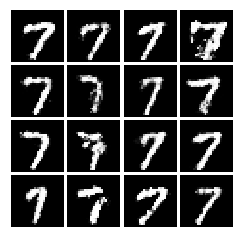

Iter: 53000
D loss: 0.9441
G_loss: 1.699


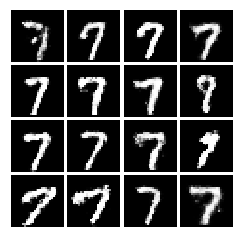

Iter: 54000
D loss: 0.9557
G_loss: 1.565


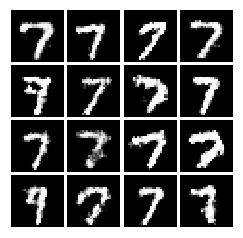

Iter: 55000
D loss: 0.8171
G_loss: 1.734


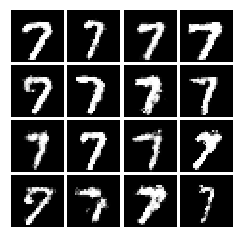

Iter: 56000
D loss: 0.7887
G_loss: 1.85


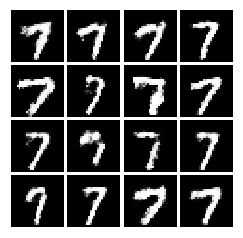

Iter: 57000
D loss: 0.7717
G_loss: 1.988


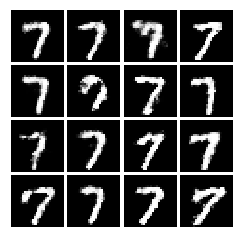

Iter: 58000
D loss: 0.9271
G_loss: 1.645


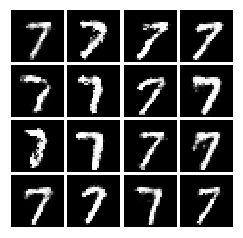

Iter: 59000
D loss: 0.8629
G_loss: 1.69


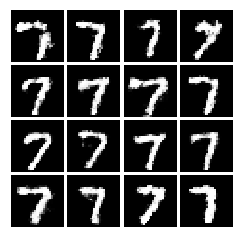

Iter: 60000
D loss: 0.8235
G_loss: 1.556


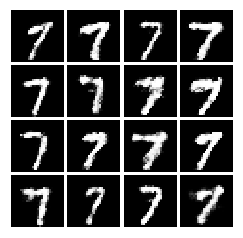

Iter: 61000
D loss: 0.8785
G_loss: 1.525


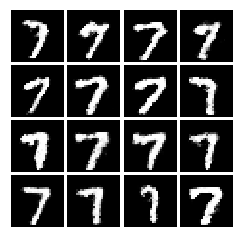

Iter: 62000
D loss: 1.079
G_loss: 1.823


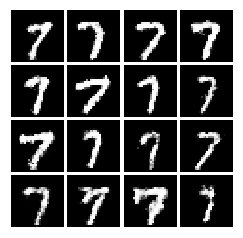

Iter: 63000
D loss: 0.9601
G_loss: 1.444


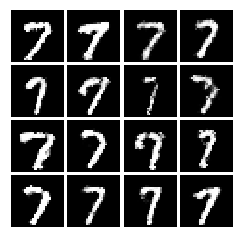

Iter: 64000
D loss: 1.046
G_loss: 1.467


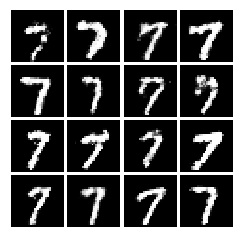

Iter: 65000
D loss: 0.7935
G_loss: 1.667


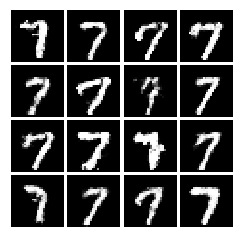

Iter: 66000
D loss: 0.9116
G_loss: 1.618


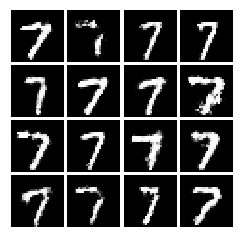

Iter: 67000
D loss: 0.8576
G_loss: 1.733


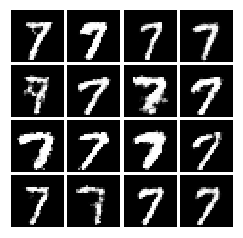

Iter: 68000
D loss: 0.8006
G_loss: 1.891


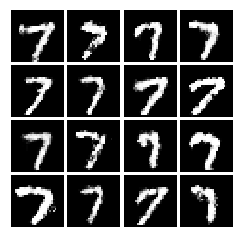

Iter: 69000
D loss: 0.6878
G_loss: 1.761


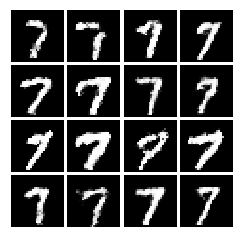

Iter: 70000
D loss: 1.012
G_loss: 1.697


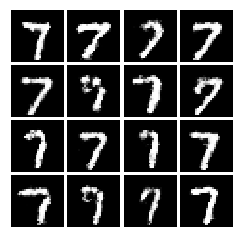

Iter: 71000
D loss: 0.6684
G_loss: 1.765


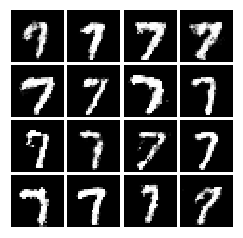

Iter: 72000
D loss: 0.9232
G_loss: 1.631


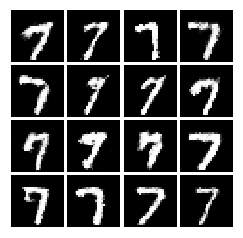

Iter: 73000
D loss: 0.7806
G_loss: 1.749


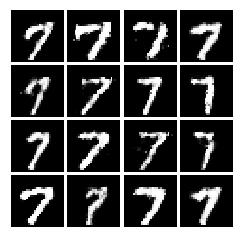

Iter: 74000
D loss: 0.8342
G_loss: 1.743


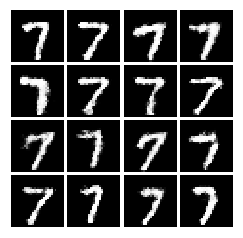

Iter: 75000
D loss: 0.8242
G_loss: 1.814


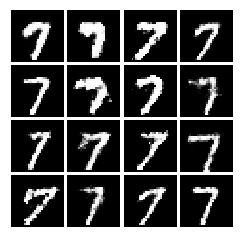

Iter: 76000
D loss: 1.01
G_loss: 1.376


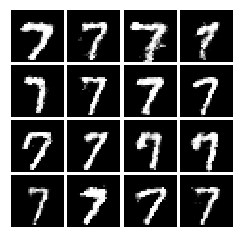

Iter: 77000
D loss: 0.9076
G_loss: 1.477


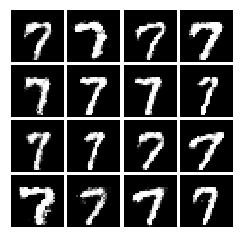

Iter: 78000
D loss: 0.8367
G_loss: 1.864


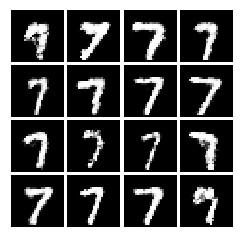

Iter: 79000
D loss: 1.033
G_loss: 1.554


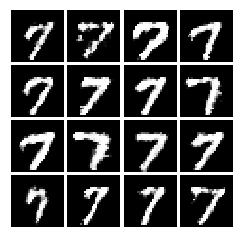

Iter: 80000
D loss: 0.8284
G_loss: 1.681


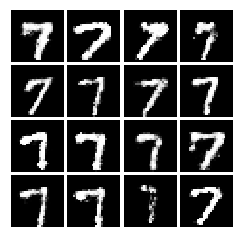

Iter: 81000
D loss: 0.824
G_loss: 1.555


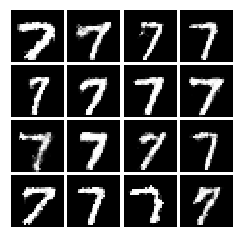

Iter: 82000
D loss: 0.8357
G_loss: 1.668


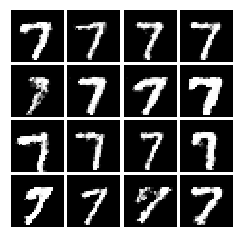

Iter: 83000
D loss: 0.9348
G_loss: 1.539


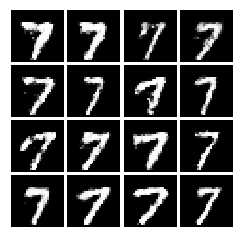

Iter: 84000
D loss: 0.8215
G_loss: 1.489


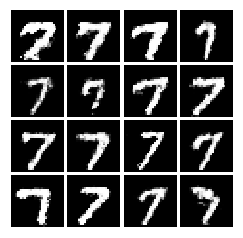

Iter: 85000
D loss: 0.8831
G_loss: 1.494


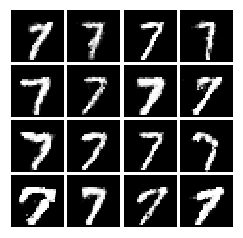

Iter: 86000
D loss: 0.8194
G_loss: 1.671


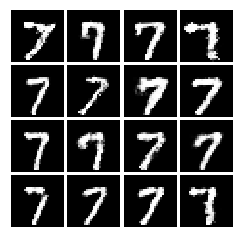

Iter: 87000
D loss: 0.788
G_loss: 2.119


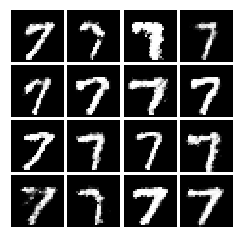

Iter: 88000
D loss: 1.029
G_loss: 1.486


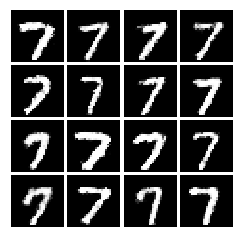

Iter: 89000
D loss: 0.8236
G_loss: 1.742


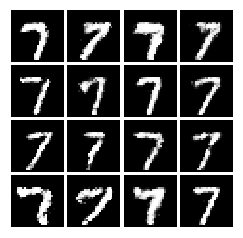

Iter: 90000
D loss: 0.9544
G_loss: 1.461


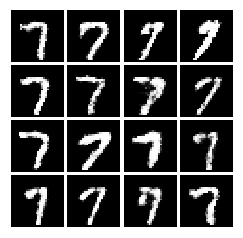

Iter: 91000
D loss: 0.767
G_loss: 1.747


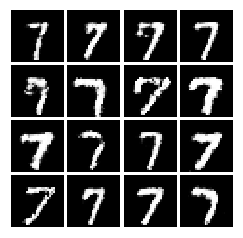

Iter: 92000
D loss: 0.8026
G_loss: 1.617


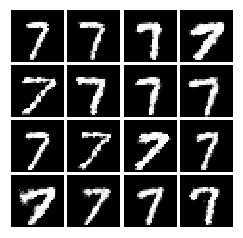

Iter: 93000
D loss: 0.865
G_loss: 1.585


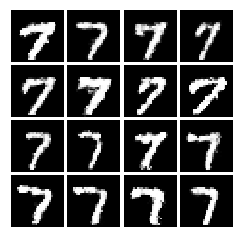

Iter: 94000
D loss: 0.7746
G_loss: 1.52


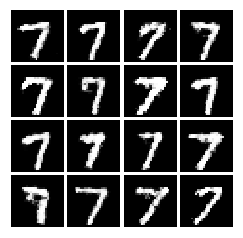

Iter: 95000
D loss: 0.8037
G_loss: 1.887


KeyboardInterrupt: 

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
i = 0

for it in range(100000):
    if it % 1000 == 0:
        n_sample = 16

        z_sample = sample_Z(n_sample, z_dimension)
        y_sample = np.zeros(shape=[n_sample, y_dimension])
        y_sample[:, 7] = 1

        samples = sess.run(g_sample, feed_dict={Z: z_sample, Y:y_sample})

        fig = plot(samples)
        plt.show()
        
    x_mb, y_mb = mnist.train.next_batch(batch_size)

    z_sample = sample_Z(batch_size, z_dimension)
    _, d_loss_curr = sess.run([d_optimizer, d_loss], feed_dict={X: x_mb, Z: z_sample, Y:y_mb})
    _, g_loss_curr = sess.run([g_optimizer, g_loss], feed_dict={Z: z_sample, Y:y_mb})

    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(d_loss_curr))
        print('G_loss: {:.4}'.format(g_loss_curr))
        
        

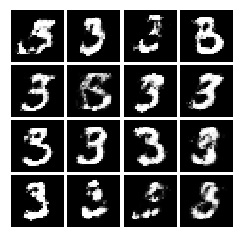

In [91]:
n_sample = 16
z_sample = sample_Z(n_sample, z_dimension)
y_sample = np.zeros(shape=[n_sample, y_dimension])
y_sample[:, 3] = 1

samples = sess.run(g_sample, feed_dict={Z: z_sample, Y:y_sample})

fig = plot(samples)
plt.show()

In [89]:
plt.imshow(mnist.train.images[0].reshape(28,28),cmap='gray')

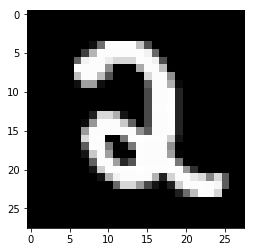

In [90]:
plt.show()